# convolutional neural networkas and computer vision

In [1]:
import os

# go through pizza_srteak and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(len(dirnames), len(filenames), dirpath)

2 0 pizza_steak
2 0 pizza_steak\test
0 250 pizza_steak\test\pizza
0 250 pizza_steak\test\steak
2 0 pizza_steak\train
1 750 pizza_steak\train\pizza
0 1 pizza_steak\train\pizza\.ipynb_checkpoints
0 750 pizza_steak\train\steak


## inspect the data

In [47]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [14]:
# visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # setup target dir
    target_folder  = target_dir+target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print("image shape:", img.shape)
    return img

image shape: (512, 512, 3)


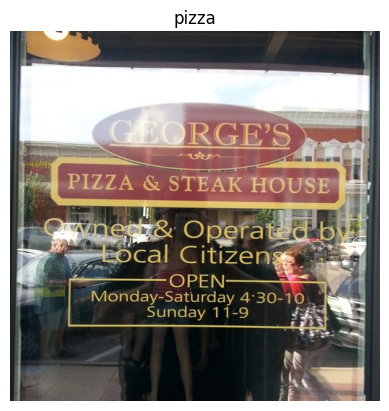

In [4]:
img = view_random_image("pizza_steak/train/", "pizza")

In [5]:
img.shape #width, height, color channels

(512, 512, 3)

In [4]:
# get all pixel values between 0-1
img/225

NameError: name 'img' is not defined

# building a CNN model

In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# normalize data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set up paths to directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)

valid_data = valid_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)

# build a cnn model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224, 3)),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1501 images belonging to 2 classes.
Found 1501 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 283ms/step - loss: 0.5990 - accuracy: 0.6582 - val_loss: 0.4678 - val_accuracy: 0.7888
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4799 - accuracy: 0.7628 - val_loss: 0.4232 - val_accuracy: 0.8281
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4180 - accuracy: 0.8175 - val_loss: 0.3746 - val_accuracy: 0.8388
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3853 - accuracy: 0.8381 - val_loss: 0.3543 - val_accuracy: 0.8421
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.3315 - accuracy: 0.8601 - val_loss: 0.2826 - val_accuracy: 0.8847


In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# breaking down cnn

image shape: (512, 382, 3)
image shape: (512, 512, 3)


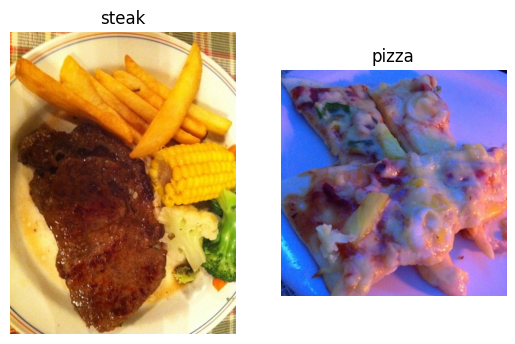

In [9]:
# vizualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [20]:
# preprocess data

# define dir
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

next step is to turn data into **batches**

batch is a small subset of data. 

In [21]:
# create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # convert image data into batches with 1/255 rescale
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# load image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode="binary", batch_size=32)

Found 1501 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a training data batch
images, labels = train_data.next() # get the next batch of images and labels in train_data
len(images), len(labels)

In [ ]:
# number of batches?
len(train_data)

In [ ]:
1500/32

In [ ]:
images[:2], images[0].shape

In [11]:
# make the vreating of the model easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential ([
    Conv2D(filters=10,
           kernel_size=3,
           strides = 1,
          padding="valid",
          activation="relu",
          input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
# fit
len(train_data), len(test_data)

In [ ]:
history_4 = model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

In [22]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 58ms/step - loss: 0.3480 - accuracy: 0.8500


[0.3480009138584137, 0.8500000238418579]

<Axes: >

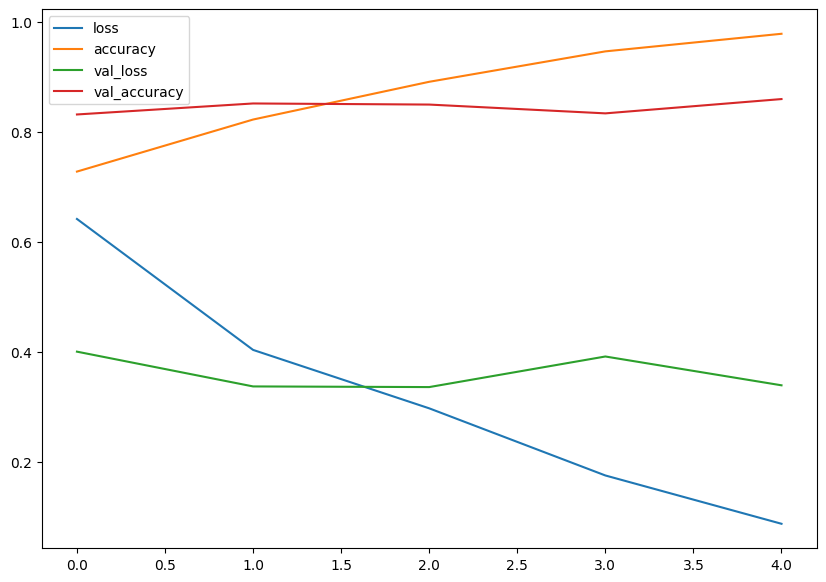

In [23]:
#evaluate the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [12]:
# plot curves seperately
def plot_loss_curves(history):
    '''
    returns stuff seperately'''
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label=  "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

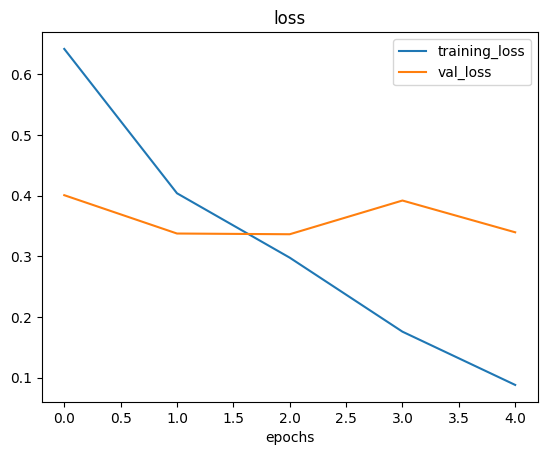

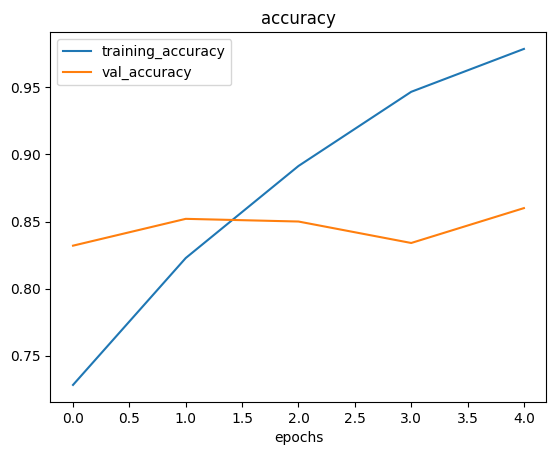

In [25]:
plot_loss_curves(history_4)

In [26]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [27]:

# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [28]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 5s 86ms/step - loss: 0.5996 - accuracy: 0.7069 - val_loss: 0.4803 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.4812 - accuracy: 0.7788 - val_loss: 0.4174 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.4280 - accuracy: 0.8155 - val_loss: 0.3637 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 4s 82ms/step - loss: 0.3932 - accuracy: 0.8301 - val_loss: 0.3430 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 3s 74ms/step - loss: 0.3631 - accuracy: 0.8488 - val_loss: 0.3281 - val_accuracy: 0.8740


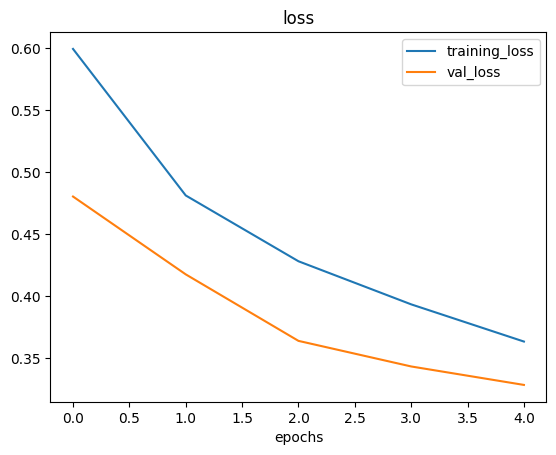

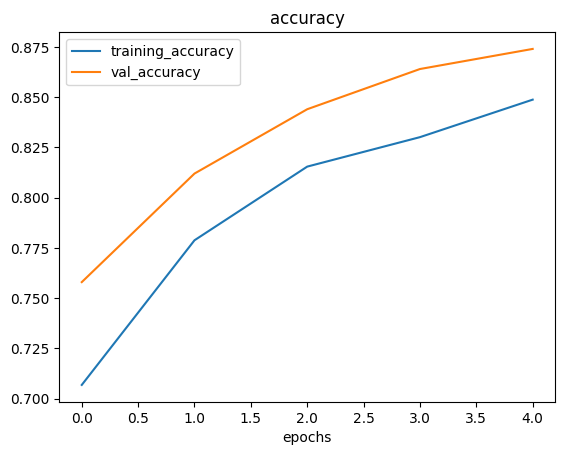

In [29]:
plot_loss_curves(history_5)

In [41]:
# data augumentation

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1501 images belonging to 2 classes.
Non-augmented training images:
Found 1501 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [42]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

NameError: name 'train_data_augmented' is not defined

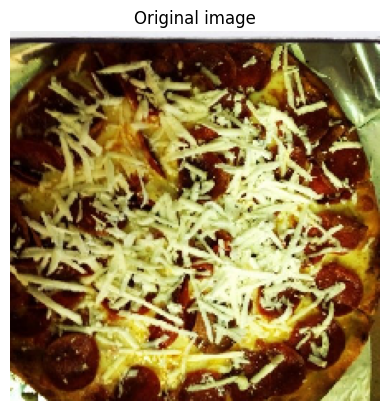

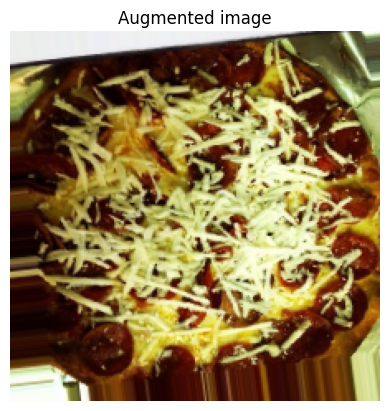

In [30]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [34]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 0.7031 - accuracy: 0.6096 - val_loss: 0.6956 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.7105 - accuracy: 0.5137 - val_loss: 0.6867 - val_accuracy: 0.5420
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6857 - accuracy: 0.5663 - val_loss: 0.6555 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.6996 - accuracy: 0.5796 - val_loss: 0.6422 - val_accuracy: 0.5680
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6832 - accuracy: 0.5663 - val_loss: 0.6319 - val_accuracy: 0.6600


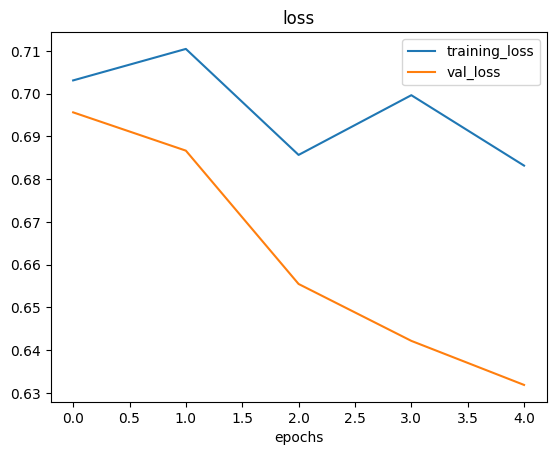

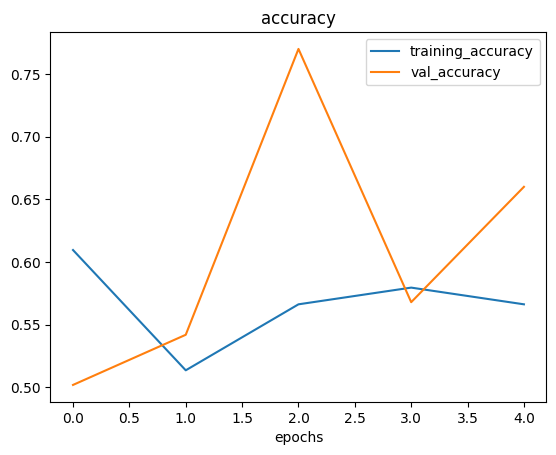

In [35]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [39]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

NameError: name 'train_datagen_augmented' is not defined

In [32]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 458ms/step - loss: 0.6565 - accuracy: 0.6129 - val_loss: 0.5335 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5399 - accuracy: 0.7209 - val_loss: 0.4023 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.5171 - accuracy: 0.7595 - val_loss: 0.4550 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5178 - accuracy: 0.7635 - val_loss: 0.3785 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4949 - accuracy: 0.7742 - val_loss: 0.3603 - val_accuracy: 0.8460


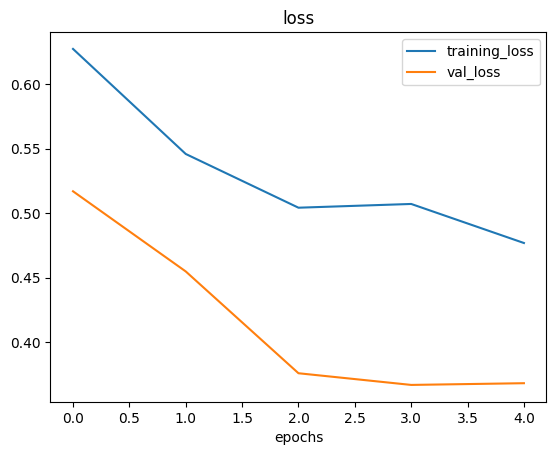

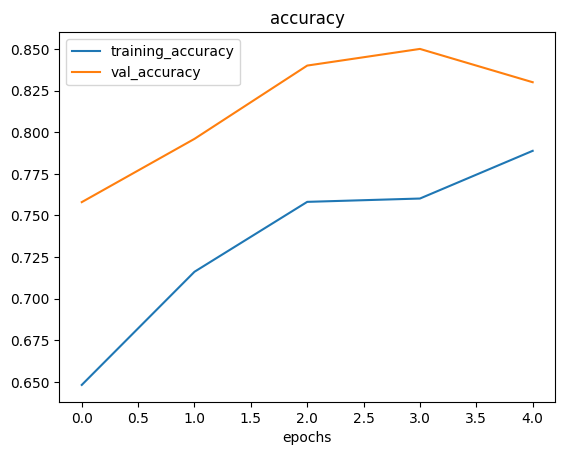

In [38]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [38]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

NameError: name 'train_data_augmented_shuffled' is not defined

# Making a prediction with trained model on on custom data

In [56]:
# classes working with:
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

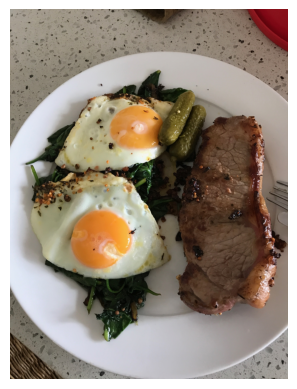

In [57]:
# view example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [58]:
steak.shape

(4032, 3024, 3)

In [59]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [31]:
# create a function to import an image and resize it to be able to be used with our model
import tensorflow as tf
def load_and_prep_image(filename, img_shape=224):
    """
    reads an image from filename turns it into a tensor and reshapes it into (img_shape, img_shape, color_channels)
    """
    # read in the image
    img = tf.io.read_file(filename)
    # decode the read file into a tensor
    img = tf.image.decode_image(img)
    # resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # rescale image (get all values between 0 and 1)
    img = img / 255
    return img

In [61]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [62]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 15ms/step


array([[0.90169847]], dtype=float32)

In [63]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [43]:
def pred_and_plot(model, filename, class_names=class_names):
    # import image
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred)]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
   
    # plot image
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [37]:
# test model
pred_and_plot(model_8, "03-steak.jpeg")

NameError: name 'model_8' is not defined

1/1 [==============================] - 0s 14ms/step


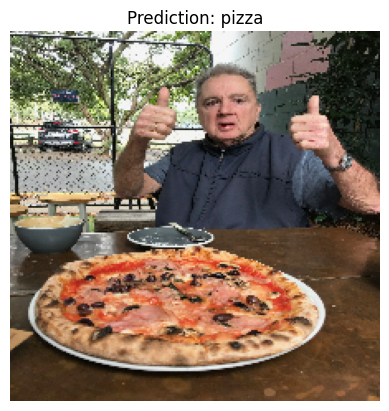

In [66]:
pred_and_plot(model_8, "03-pizza-dad.jpeg")

## Multi-class Image Classification

Image classification

now more than just pizza vs steak, now has 10 classes of food

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (be baseline and reduce overfiting)
7. Repeat until satisfied

In [1]:
# setup train and test dires
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

# setup defs
def view_random_image(target_dir, target_class):
    # setup target dir
    target_folder  = target_dir+target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print("image shape:", img.shape)
    return img

In [2]:
# subdirectories (class names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# create a cnn model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# create model

model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [9]:
history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 73s 266ms/step - loss: 2.1491 - accuracy: 0.2147 - val_loss: 2.0240 - val_accuracy: 0.2824
Epoch 2/5
235/235 [==============================] - 18s 76ms/step - loss: 1.9337 - accuracy: 0.3215 - val_loss: 1.9012 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 18s 77ms/step - loss: 1.6251 - accuracy: 0.4473 - val_loss: 1.9586 - val_accuracy: 0.3208
Epoch 4/5
235/235 [==============================] - 18s 78ms/step - loss: 1.1050 - accuracy: 0.6317 - val_loss: 2.3417 - val_accuracy: 0.2920
Epoch 5/5
235/235 [==============================] - 19s 79ms/step - loss: 0.5374 - accuracy: 0.8237 - val_loss: 3.3117 - val_accuracy: 0.2676


In [10]:
# evaluate the model
model_9.evaluate(test_data)

79/79 [==============================] - 5s 57ms/step - loss: 3.3117 - accuracy: 0.2676


[3.31170654296875, 0.26759999990463257]

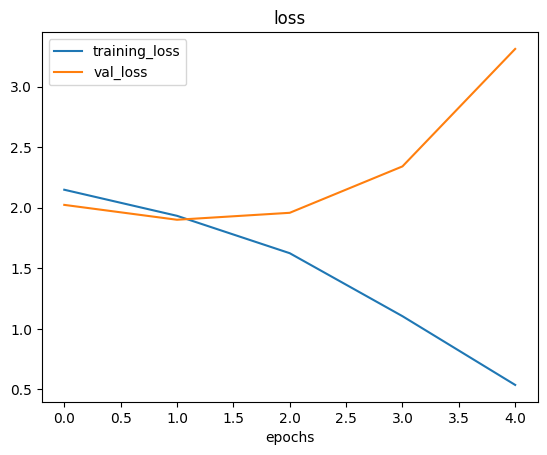

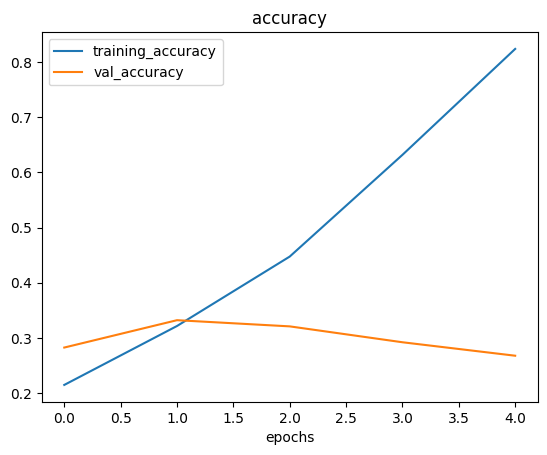

In [15]:
plot_loss_curves(history_9)

# model is overfitting
this needs to be fixed

# adjust the model hyperparameters (to beat the baseline/reduce overfitting)

In [16]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [17]:
model_9_refit = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9_refit.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [18]:
history_9_refit = model_9_refit.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 17s 71ms/step - loss: 2.1383 - accuracy: 0.2281 - val_loss: 2.0132 - val_accuracy: 0.2932
Epoch 2/5
235/235 [==============================] - 16s 69ms/step - loss: 1.6907 - accuracy: 0.4300 - val_loss: 1.8794 - val_accuracy: 0.3620
Epoch 3/5
235/235 [==============================] - 16s 68ms/step - loss: 1.2041 - accuracy: 0.6164 - val_loss: 1.9997 - val_accuracy: 0.3400
Epoch 4/5
235/235 [==============================] - 15s 66ms/step - loss: 0.7593 - accuracy: 0.7728 - val_loss: 2.3459 - val_accuracy: 0.3404
Epoch 5/5
235/235 [==============================] - 15s 65ms/step - loss: 0.4194 - accuracy: 0.8889 - val_loss: 2.7316 - val_accuracy: 0.3064


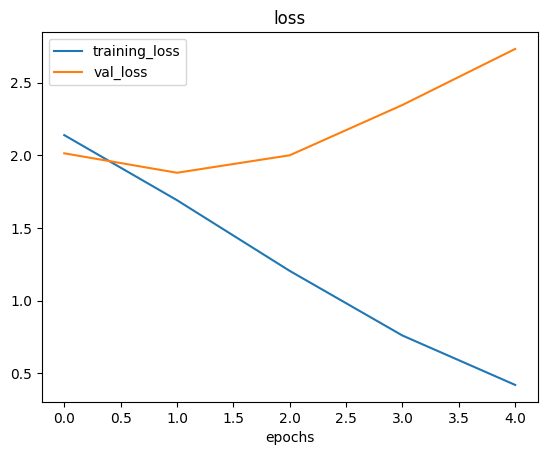

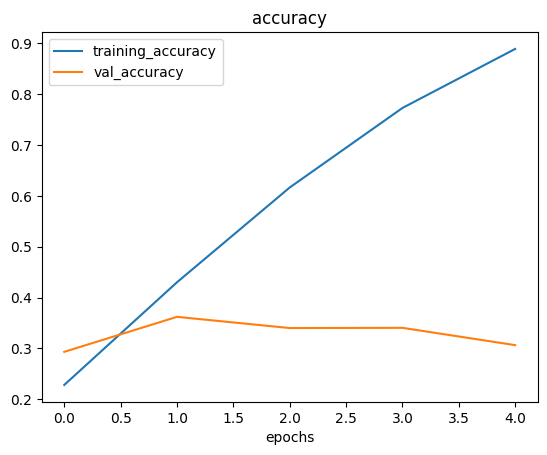

In [19]:
plot_loss_curves(history_9_refit)

In [20]:
train_datagen_augumented = ImageDataGenerator(rescale=1/255, rotation_range=0.2, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [21]:
model_10 = tf.keras.models.clone_model(model_9)
model_10.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [23]:
model_10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [24]:
history_10 = model_10.fit(train_data_augumented, epochs=5, steps_per_epoch=len(train_data_augumented), validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 210ms/step - loss: 2.2825 - accuracy: 0.1336 - val_loss: 2.1899 - val_accuracy: 0.1964
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 2.2058 - accuracy: 0.1895 - val_loss: 2.0640 - val_accuracy: 0.2520
Epoch 3/5
235/235 [==============================] - 47s 201ms/step - loss: 2.1108 - accuracy: 0.2431 - val_loss: 1.9772 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 2.0498 - accuracy: 0.2775 - val_loss: 1.8998 - val_accuracy: 0.3444
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 1.9973 - accuracy: 0.3007 - val_loss: 1.9124 - val_accuracy: 0.3420


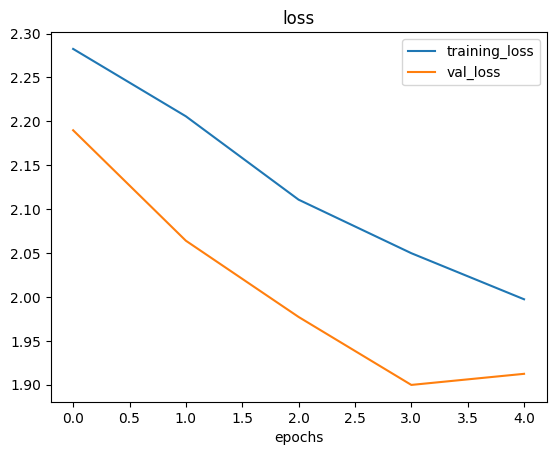

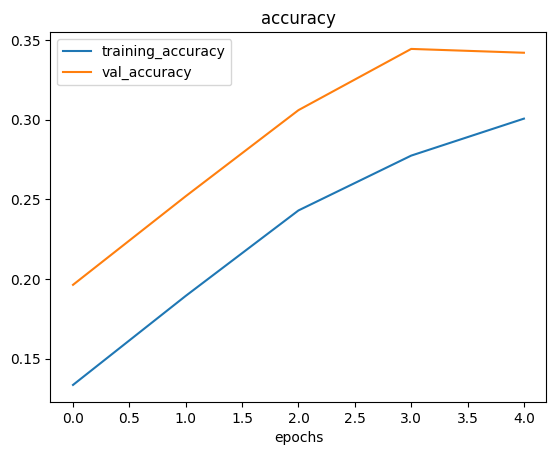

In [26]:
plot_loss_curves(history_10)

1/1 [==============================] - 0s 17ms/step


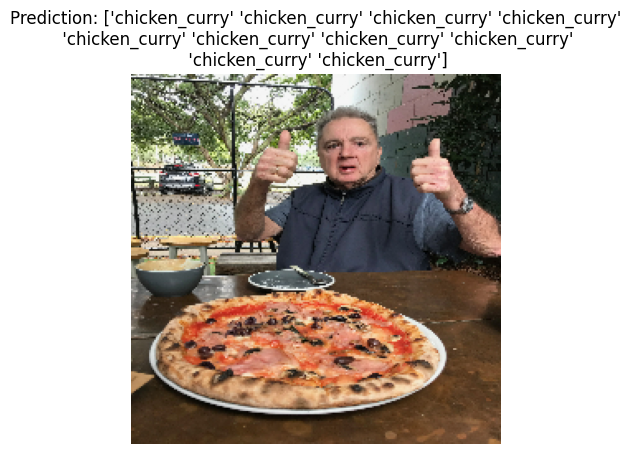

In [44]:
pred_and_plot(model=model_10, filename="03-pizza-dad.jpeg", class_names=class_names)

In [45]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


INFO:tensorflow:Assets written to: saved_trained_model_10\assets
